# MNIST data set- SVM

It is a large database of handwritten digits that re used for training and image processing.

https://en.wikipedia.org/wiki/MNIST_database

http://yann.lecun.com/exdb/mnist/

http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

### IMPORT

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

### Load Data
I am using the tensorflow, since they have this in their tutorials.

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('MNIST_data/',one_hot=True)
# The labels are loaded as one hot vector. I will convert them to digits from 0-9

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
#Separating the training and test datasets
X_train = data.train.images
y_train = np.argmax(data.train.labels, axis=1)#convert to digits

X_test = data.test.images
y_test = np.argmax(data.test.labels, axis=1)#convert to digits

In [10]:
print ("Size of training dataset = {}".format(X_train.shape[0]))
print ("Size of test dataset = {}".format(X_test.shape[0]))

# Each original image was is 28 X 28 and is flattended to a 784 1D array.
print ("Number of feature = {}".format(X_train.shape[1]))


Size of training dataset = 55000
Size of test dataset = 10000
Number of feature = 784


## Function to plot some digits

In [11]:
def plot_images(images, labels):
    fig, axes = plt.subplots(4,4)
    fig.subplots_adjust(hspace = 0.5,wspace = 0.5)
    
    for i,ax in zip(np.random.choice(range(images.shape[0]),16),axes.flat):
        ax.imshow(images[i].reshape(28,28),cmap='binary')
        ax.set_xlabel('label : {}'.format(labels[i]))
        ax.set_xticks([])
        ax.set_yticks([])
        

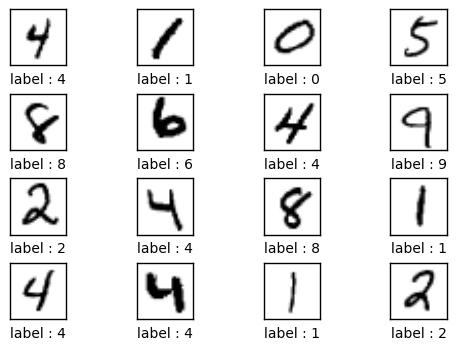

In [12]:
plot_images(X_test,y_test)

## Using SVM
Previously using Logisitc Regression we had found that using PCA with 50 components was sufficient to achive ~91% accuracy in predicting the test dataset. In this notebook we will use SVM with PCA and check if we can get better predictions.

#### Performing PCA

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50,whiten=True,svd_solver='full')
    
pca.fit(X_train)

X_train_trans = pca.transform(X_train)
X_test_trans = pca.transform(X_test)
    

In the preivous notebook (MNIST-Logistic Regression), we had observed that ~50 components yielded accuracy score that was similar to what of obtained used all the 784 features. Hence, for the SVM analysis, I have first performed the PCA to reduce the data to 50 components.

## SVM - Linear kernel

### Perform grid search to estimate the best parameter C

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'C':[10**x for x in range(-2,3)]}

In [31]:
svc_linear = SVC(kernel='linear',cache_size=1000)
clf_svc_linear = GridSearchCV(svc_linear,param_grid=parameters,verbose = 3, n_jobs=-1)
clf_svc_linear.fit(X_train_trans,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=1 .............................................................
[CV] C=1 .............................................................
[CV] C=1 .............................................................
[CV] ............................ C=0.1, score=0.927508, total= 2.1min
[CV] C=10 ............................................................
[CV] ............................ C=0.1, score=0.929405, total= 2.2min
[CV] C=10 ............................................................
[CV] ............................ C=0.1, score=0.928451, total= 2.1min
[CV] C=10 ............................................................
[CV] .............................. C=1, score=0.927835, total= 3.2min
[CV] C=100 ......

[Parallel(n_jobs=-1)]: Done   6 out of  12 | elapsed:  4.5min remaining:  4.5min


[CV] ............................. C=10, score=0.928778, total= 8.4min
[CV] ............................. C=10, score=0.928981, total= 8.5min
[CV] ............................. C=10, score=0.927987, total= 8.8min
[CV] ............................ C=100, score=0.928762, total=39.8min
[CV] ............................ C=100, score=0.928123, total=40.2min
[CV] ............................ C=100, score=0.928205, total=40.3min


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 45.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=3)

In [34]:
print (" Best parameter : {}".format(clf_svc_linear.best_params_))


 Best parameter : {'C': 10}


### Classification report and confusion matrix

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_svc_linear = clf_svc_linear.predict(X_test_trans)

print ("Classification Report :")
print (classification_report(y_true=y_test,y_pred=y_pred_svc_linear))

Classification Report :
             precision    recall  f1-score   support

          0       0.96      0.99      0.98       980
          1       0.97      0.99      0.98      1135
          2       0.92      0.93      0.93      1032
          3       0.90      0.93      0.91      1010
          4       0.93      0.96      0.94       982
          5       0.90      0.87      0.89       892
          6       0.96      0.96      0.96       958
          7       0.95      0.93      0.94      1028
          8       0.93      0.90      0.92       974
          9       0.94      0.90      0.92      1009

avg / total       0.94      0.94      0.94     10000



Confusion Matrix :
[[ 969    0    1    2    0    5    2    1    0    0]
 [   0 1121    3    1    0    2    2    0    6    0]
 [   7    6  964   10   11    3    8    9   14    0]
 [   1    0   21  938    2   21    0   10   11    6]
 [   1    0    8    1  941    1    6    3    2   19]
 [   8    5    7   51    4  779   13    1   19    5]
 [   8    3    9    2    7   13  915    1    0    0]
 [   1    9   20    5    8    0    0  961    3   21]
 [   6    4    9   21    6   34    7    6  876    5]
 [   5    9    4   10   35    6    1   22    8  909]]


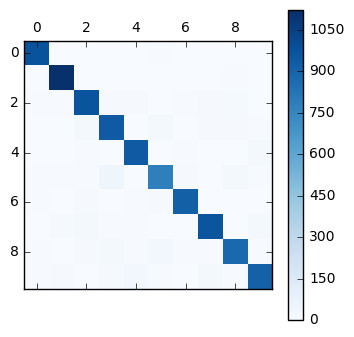

Accuracy = 0.9373


In [37]:
cm1 = confusion_matrix(y_true=y_test,y_pred=y_pred_svc_linear)
print ("Confusion Matrix :")
print (cm1)
plt.matshow(cm1,cmap="Blues")
plt.colorbar()
plt.show()

print ("Accuracy = {}".format(np.trace(cm1)/len(y_test)))

The SVM with a linear kernel gives an accuracy score of ~93% which is an improvement over logistic regression

## SVM - rbf kernel

### Perform grid search to estimate the best parameter C

In [39]:
parameters = {'C':[10**x for x in range(-2,3)]}
svc_rbf = SVC(kernel='rbf',cache_size=1000)
clf_svc_rbf = GridSearchCV(svc_rbf,param_grid=parameters,verbose = 3, n_jobs=-1)
clf_svc_rbf.fit(X_train_trans,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] ............................ C=0.1, score=0.957883, total= 6.8min
[CV] C=1 .............................................................
[CV] ............................ C=0.1, score=0.957681, total= 6.9min
[CV] C=1 .............................................................
[CV] ............................ C=0.1, score=0.955436, total= 7.0min
[CV] C=1 .............................................................
[CV] .............................. C=1, score=0.979168, total= 3.5min
[CV] C=10 .......

[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 26.1min remaining: 13.0min


[CV] ........................... C=0.01, score=0.903235, total=19.3min
[CV] ........................... C=0.01, score=0.908838, total=19.6min
[CV] ............................ C=100, score=0.980527, total= 3.5min
[CV] ............................ C=100, score=0.981895, total= 3.5min
[CV] ............................ C=100, score=0.980033, total= 3.5min


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 27.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=3)

In [41]:
print ("Best estimator : {}".format(clf_svc_rbf.best_params_))

Best estimator : {'C': 10}


### Classification report and confusion matrix

In [42]:
y_pred_svc_rbf = clf_svc_rbf.predict(X_test_trans)

print ("Classification Report :")
print (classification_report(y_true=y_test,y_pred=y_pred_svc_rbf))

Classification Report :
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.99      0.98      1010
          4       0.98      0.99      0.99       982
          5       0.98      0.99      0.99       892
          6       0.99      0.99      0.99       958
          7       0.99      0.98      0.98      1028
          8       0.98      0.98      0.98       974
          9       0.98      0.98      0.98      1009

avg / total       0.98      0.98      0.98     10000



Confusion Matrix :
[[ 974    0    0    0    0    1    3    1    1    0]
 [   0 1125    2    1    2    3    1    1    0    0]
 [   4    1 1014    0    1    0    1    5    6    0]
 [   0    0    3  995    1    4    0    2    4    1]
 [   0    0    2    0  970    0    2    0    0    8]
 [   2    0    0    8    0  880    2    0    0    0]
 [   5    2    2    0    2    1  945    0    1    0]
 [   0    3   10    0    3    1    0 1006    1    4]
 [   3    0    1    6    1    1    1    2  955    4]
 [   2    1    0    3    7    3    1    4    4  984]]


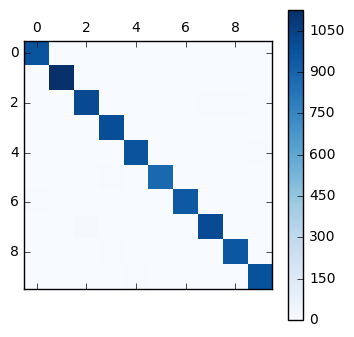

Accuracy = 0.9848


In [43]:
cm2 = confusion_matrix(y_true=y_test,y_pred=y_pred_svc_rbf)
print ("Confusion Matrix :")
print (cm2)
plt.matshow(cm2,cmap="Blues")
plt.colorbar()
plt.show()

print ("Accuracy = {}".format(np.trace(cm2)/len(y_test)))

The SVM with a rbf kernel gives an accuracy score of ~98.5% which is better compared to linear kernel.

## SVM - Polynomial kernel - degree = 2

### Perform grid search to estimate the best parameter C

In [44]:
# degree = 2
parameters = {'C':[10**x for x in range(-2,3)]}
svc_poly2 = SVC(kernel='poly',degree=2,cache_size=1000)
clf_svc_poly2 = GridSearchCV(svc_poly2,param_grid=parameters,verbose = 3, n_jobs=-1)
clf_svc_poly2.fit(X_train_trans,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] ............................ C=0.1, score=0.966127, total= 6.5min
[CV] C=1 .............................................................
[CV] ............................ C=0.1, score=0.966067, total= 6.6min
[CV] C=1 .............................................................
[CV] ............................ C=0.1, score=0.964771, total= 6.9min
[CV] C=1 .............................................................
[CV] .............................. C=1, score=0.975296, total= 2.9min
[CV] C=10 .......

[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 22.1min remaining: 11.1min


[CV] ............................ C=100, score=0.969733, total= 2.4min
[CV] ............................ C=100, score=0.969722, total= 2.4min
[CV] ........................... C=0.01, score=0.907891, total=20.1min
[CV] ........................... C=0.01, score=0.904216, total=20.3min
[CV] ........................... C=0.01, score=0.911620, total=21.0min


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 25.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=3)

In [51]:
print ("Best parameter : {}".format(clf_svc_poly2.best_params_))

Best parameter : {'C': 1}


### Classification report and confusion matrix

In [46]:
y_pred_svc_poly2 = clf_svc_poly2.predict(X_test_trans)

print ("Classification Report :")
print (classification_report(y_true=y_test,y_pred=y_pred_svc_poly2))

Classification Report :
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.98      0.98      1010
          4       0.99      0.98      0.99       982
          5       0.97      0.98      0.97       892
          6       0.98      0.98      0.98       958
          7       0.98      0.98      0.98      1028
          8       0.97      0.97      0.97       974
          9       0.98      0.97      0.97      1009

avg / total       0.98      0.98      0.98     10000



Confusion Matrix :
[[ 971    0    1    0    0    1    4    1    1    1]
 [   0 1128    2    1    1    0    2    0    1    0]
 [   1    0 1015    0    1    0    2    5    8    0]
 [   0    0    5  988    0    9    0    2    5    1]
 [   1    0    2    0  966    0    3    1    0    9]
 [   2    0    2   11    0  870    3    1    2    1]
 [   9    2    1    0    2    4  939    0    1    0]
 [   0    3    7    2    1    0    0 1003    4    8]
 [   3    1    2    6    1    6    0    3  949    3]
 [   1    3    4    5    7    4    1    4    4  976]]


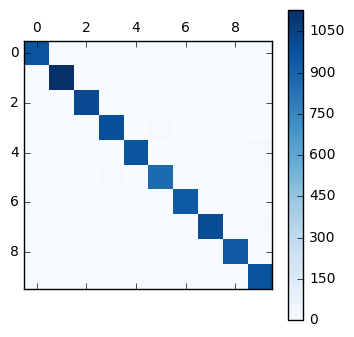

Accuracy = 0.9805


In [47]:
cm3 = confusion_matrix(y_true=y_test,y_pred=y_pred_svc_poly2)
print ("Confusion Matrix :")
print (cm3)
plt.matshow(cm3,cmap="Blues")
plt.colorbar()
plt.show()

print ("Accuracy = {}".format(np.trace(cm3)/len(y_test)))

The predict of SVM with polynomical kernel of degree 2 is ~98%. This is very similar to what we got with rbf. Let's test if a higher degree polynomila can make better prediction.

## SVM - Polynomial kernel - degree = 3

### Perform grid search to estimate the best parameter C

In [48]:
# degree = 3
parameters = {'C':[10**x for x in range(-2,3)]}
svc_poly3 = SVC(kernel='poly',degree=3,cache_size=1000)
clf_svc_poly3 = GridSearchCV(svc_poly3,param_grid=parameters,verbose = 3, n_jobs=-1)
clf_svc_poly3.fit(X_train_trans,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] ............................ C=0.1, score=0.956417, total=10.0min
[CV] C=1 .............................................................
[CV] ............................ C=0.1, score=0.959847, total=10.2min
[CV] C=1 .............................................................
[CV] ............................ C=0.1, score=0.957518, total=10.6min
[CV] C=1 .............................................................
[CV] .............................. C=1, score=0.975732, total= 4.9min
[CV] C=10 .......

[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 31.3min remaining: 15.6min


[CV] ........................... C=0.01, score=0.626023, total=24.6min
[CV] ............................ C=100, score=0.975241, total= 4.0min
[CV] ............................ C=100, score=0.974363, total= 3.9min
[CV] ............................ C=100, score=0.976378, total= 3.8min


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 34.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=3)

In [52]:
print ("Best parameter : {}".format(clf_svc_poly3.best_params_))

Best parameter : {'C': 10}


### Classification report and confusion matrix

In [53]:
y_pred_svc_poly3 = clf_svc_poly3.predict(X_test_trans)

print ("Classification Report :")
print (classification_report(y_true=y_test,y_pred=y_pred_svc_poly3))

Classification Report :
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.97      0.98      1032
          3       0.97      0.98      0.98      1010
          4       0.98      0.98      0.98       982
          5       0.98      0.98      0.98       892
          6       0.99      0.98      0.98       958
          7       0.98      0.98      0.98      1028
          8       0.98      0.97      0.98       974
          9       0.98      0.97      0.98      1009

avg / total       0.98      0.98      0.98     10000



Confusion Matrix :
[[ 974    0    1    0    0    1    2    0    1    1]
 [   0 1126    2    0    1    3    1    1    1    0]
 [   5    2 1005    6    1    0    2    6    5    0]
 [   0    0    2  991    0    4    0    4    8    1]
 [   2    0    2    0  962    0    3    2    0   11]
 [   2    0    2   11    0  870    4    1    2    0]
 [   6    3    1    0    5    1  941    0    1    0]
 [   0    6    7    0    2    1    0 1005    0    7]
 [   3    1    4    7    3    3    0    2  949    2]
 [   1    2    0    6    6    2    1    5    4  982]]


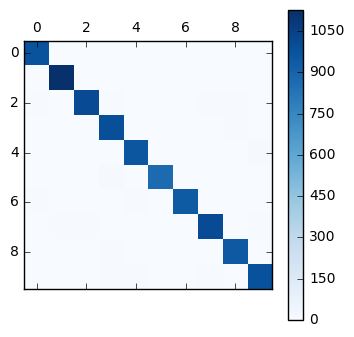

Accuracy = 0.9805


In [55]:
cm4 = confusion_matrix(y_true=y_test,y_pred=y_pred_svc_poly3)
print ("Confusion Matrix :")
print (cm4)
plt.matshow(cm4,cmap="Blues")
plt.colorbar()
plt.show()

print ("Accuracy = {}".format(np.trace(cm4)/len(y_test)))

Increasing the order of the polynomial from 2 to 3 did not improve accuracy.

## SVM - Polynomial kernel - degree = 5

### Perform grid search to estimate the best parameter C

In [56]:
#degree = 5
parameters = {'C':[10**x for x in range(-2,3)]}
svc_poly5 = SVC(kernel='poly',degree=5,cache_size=1000)
clf_svc_poly5 = GridSearchCV(svc_poly5,param_grid=parameters,verbose = 3, n_jobs=-1)
clf_svc_poly5.fit(X_train_trans,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] ............................ C=0.1, score=0.777578, total=18.2min
[CV] C=1 .............................................................
[CV] ............................ C=0.1, score=0.771887, total=18.3min
[CV] C=1 .............................................................
[CV] ............................ C=0.1, score=0.796095, total=18.4min
[CV] C=1 .............................................................
[CV] ........................... C=0.01, score=0.155537, total=24.3min
[CV] C=10 .......

[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 42.0min remaining: 21.0min


[CV] ............................. C=10, score=0.961817, total= 8.2min
[CV] ............................. C=10, score=0.965194, total= 8.4min
[CV] ............................ C=100, score=0.963516, total= 6.9min
[CV] ............................ C=100, score=0.960672, total= 6.7min
[CV] ............................ C=100, score=0.962902, total= 7.0min


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 46.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=3)

In [57]:
print ("Best parameter : {}".format(clf_svc_poly5.best_params_))

Best parameter : {'C': 10}


### Classification report and confusion matrix

In [59]:
y_pred_svc_poly5 = clf_svc_poly5.predict(X_test_trans)

print ("Classification Report : ")
print (classification_report(y_true=y_test,y_pred=y_pred_svc_poly5))

Classification Report : 
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       980
          1       0.95      0.99      0.97      1135
          2       0.98      0.94      0.96      1032
          3       0.97      0.97      0.97      1010
          4       0.97      0.98      0.98       982
          5       0.98      0.97      0.97       892
          6       0.99      0.97      0.98       958
          7       0.97      0.97      0.97      1028
          8       0.97      0.97      0.97       974
          9       0.96      0.97      0.97      1009

avg / total       0.97      0.97      0.97     10000



Confusion Matrix :
[[ 960    4    1    0    0    3    4    2    3    3]
 [   0 1128    1    1    0    2    1    0    1    1]
 [   7   17  971    7    2    0    0   15   11    2]
 [   0    0    2  984    0    4    0    6    6    8]
 [   0    2    0    0  961    0    3    2    2   12]
 [   2    5    1    8    1  864    3    1    4    3]
 [   4   13    1    0    5    4  930    0    0    1]
 [   0   13    7    0    5    1    0  994    2    6]
 [   1    6    2   11    6    2    0    3  941    2]
 [   2    4    2    3    7    1    1    6    3  980]]


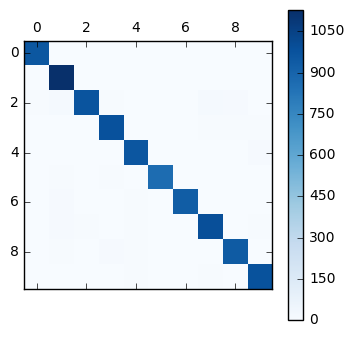

Accuracy = 0.9713


In [60]:
cm5 = confusion_matrix(y_true=y_test,y_pred=y_pred_svc_poly5)
print ("Confusion Matrix :")
print (cm5)
plt.matshow(cm5,cmap="Blues")
plt.colorbar()
plt.show()

print ("Accuracy = {}".format(np.trace(cm5)/len(y_test)))

The accuracy score is only 0.9713. We observe that increasing the order of the polynomial actually results in a decrease in the accuracy. 